In [1]:
using Pkg, Revise
Pkg.activate("../.")

  Activating project at `~/MEGA/EMAP/Diagrams.jl`


In [413]:
using CliffordAlgebras
using LinearAlgebra
using Plots

In [3]:
cl2 = CliffordAlgebra(2)

Cl(2,0,0)

In [4]:
propertynames(cl2)
# 𝟏 === \bfone

(:𝟏, :e1, :e2, :e1e2)

In [5]:
I₂ = cl2.e1 ∧ cl2.e2

+1×e1e2 ∈ Cl(2, 0, 0)

In [6]:
a = 1cl2.e1
b = -0.5cl2.e1 + 1cl2.e2
c = -0.5cl2.e1 - 1cl2.e2
a + b + c

0

In [7]:
△ = (a ∧ b) / (2I₂) # Area of Triangle

+0.5 ∈ Cl(2, 0, 0)

In [8]:
a ∧ b == b ∧ c, b ∧ c == c ∧ a

(true, true)

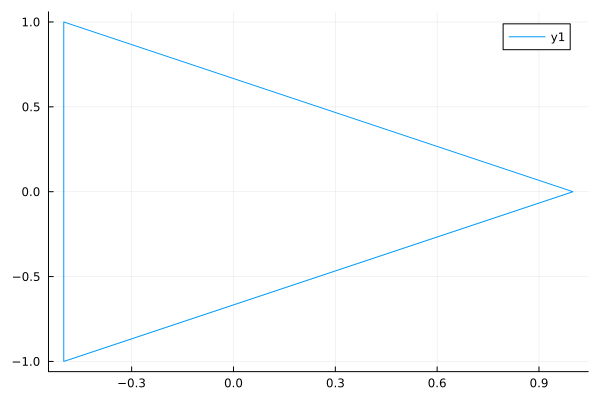

In [9]:
x = [x.e1 for x in [a,b,c,a]]
y = [y.e2 for y in [a,b,c,a]]

plot(x,y)

# Dual

In [64]:
cl = CliffordAlgebra(3)
I₃ = cl.e1e2e3


f1 = 2cl.e1 - 3cl.e2
f2 = cl.e1 - 2cl.e2 + 3cl.e3

@show f1 ∧ f2 == -1(cl.e1 ∧ cl.e2) + 6(cl.e1 ∧ cl.e3) - 9(cl.e2 ∧ cl.e3)

@show (f1 ∧ f2)⨼ I₃ == 9cl.e1 + 6cl.e2 + cl.e3;

f1 ∧ f2 == (-1 * (cl.e1 ∧ cl.e2) + 6 * (cl.e1 ∧ cl.e3)) - 9 * (cl.e2 ∧ cl.e3) = true
(f1 ∧ f2) ⨼ I₃ == 9 * cl.e1 + 6 * cl.e2 + cl.e3 = true


In [69]:
B = 5cl.e1 ∧ cl.e2 + 6cl.e1 ∧ cl.e3 + 7cl.e2 ∧ cl.e3

dual(B)

+7×e1-6×e2+5×e3 ∈ Cl(3, 0, 0)

In [71]:
B ⨼ inv(I₃)

+7.0×e1-6.0×e2+5.0×e3 ∈ Cl(3, 0, 0)

In [193]:
cl = CliffordAlgebra(2)

p = 0cl.e1 + 0cl.e2
q = 1cl.e1 + 1cl.e2

p ∧ q

0

# Example 2 - Conformal Algebra

In [317]:
# cl = CliffordAlgebra(3,1,0)
cl = CliffordAlgebra(:CGA2D)

Cl(3,1,0)

The conformal algebra is a bit different from the $\mathbb R^{3,1,0}$ algebra. The difference is when
defining the extra basis vectors, which are called $n_0$ and $n_\infty$ in the conformal model.

These two are computed below:

In [318]:
𝟏  = cl.𝟏
e1 = cl.e1
e2 = cl.e2
e₊ = cl.e₊
e₋ = cl.e₋

no = (cl.e₊ + cl.e₋)/2
n∞ = cl.e₋ - cl.e₊

propertynames(cl)

(:𝟏, :e1, :e2, :e₊, :e₋, :e1e2, :e1e₊, :e2e₊, :e1e₋, :e₋e2, :e₊e₋, :e1e₊e2, :e1e2e₋, :e1e₋e₊, :e2e₊e₋, :e1e2e₊e₋)

In [319]:
@show e₊ ⋅ e₋
@show e₊ ⋅ e₊

e₊ ⋅ e₋ = 0
e₊ ⋅ e₊ = +1 ∈ Cl(3, 1, 0)


+1 ∈ Cl(3, 1, 0)

In [320]:
@show no ⋅ n∞
@show no ⋅ no
@show n∞ ⋅ n∞;

no ⋅ n∞ = -1.0 ∈ Cl(3, 1, 0)
no ⋅ no = 0
n∞ ⋅ n∞ = 0


In the conformal model, a finite unitary point is:
$$
p = n_0 + \alpha_1 e_1 + ... + \alpha_k e_k + \frac{1}{2} \sum^k_{i=1} \alpha_i^2 n_\infty
$$


In [321]:
point(x,y) = no + x*e1 + y*e2 + (x^2 + y^2)/2 * n∞

point (generic function with 2 methods)

In [322]:
a = point(-1.5, -0.5)
b = point( 0.5, 1.5)
c = point( 1.0, -0.5)

+1.0×e1-0.5×e2-0.125×e₊+1.125×e₋ ∈ Cl(3, 1, 0)

Seja $a = n_0 + \alpha_1 e_1 + ... + \alpha_k e_k + \frac{1}{2} \sum^k_{i=1} \alpha_i^2 n_\infty$ e 
$b = n_0 + \beta_1 e_1 + ... + \beta_k e_k + \frac{1}{2} \sum^k_{i=1} \beta_i^2 n_\infty$.
Note que o produto interno de dois pontos é igual à $-\frac{1}{2} d_e(a,b)^2$ , onde
$$
d_e(a,b) = \sum^k_{i=1} \beta_i - \alpha_i
$$

In [323]:
dₑ(a::MultiVector,b::MultiVector) = √((b.e1 - a.e1)^2 + (b.e2 - a.e2)^2)
(a ⋅ b).𝟏 ≈ -0.5*dₑ(a,b)^2

true

A point is "normalized" if $-n_\infty \cdot p = 1$.
Also, note that $a \cdot a = 0$. Look:

In [324]:
@show -n∞ ⋅ a
@show a ⋅ a;

-n∞ ⋅ a = +1.0 ∈ Cl(3, 1, 0)
a ⋅ a = 0


In [494]:
grin(a)

-2.0×e1+1.5×e₊-2.5×e₋ ∈ Cl(3, 1, 0)

## Straight Lines and Planes

First, we define the Dual Plane, which is equal to a "vector" without the $n_o$ component.
Hence, $\pi = \alpha_1 e_1 + \alpha_2 e_2 + \delta n_\infty$. Denote $\mathbf n = \alpha_1 e_1 + \alpha_2 e_2$. This
is vector normal to the dual plane. Hence, $\pi$ represents the dual plane
that is placed at $\mathbf n \frac{\delta}{||n||^2}$ from the origin.

In [495]:
δ = 1
n = normalize([2,1])
n = [2,1]


v = n[1]cl.e1 + n[2]cl.e2 + δ*n∞

# Here we are creating a vector x in the hyperplane defined by moving 
x = [-1,2] + n * δ/norm(n)^2
@show dot(x,n) - δ == v ⋅ point(x...)

dot(x,n) - δ

dot(x, n) - δ == v ⋅ point(x...) = true


0.0

These are constructed via the external product of two or three points with $n_\infty$.
Let's start with the so called "planar point". This is just the external product of a point with $n_\infty$. 

In [326]:
p = point(0,0)
p ∧ n∞

+1.0×e₊e₋ ∈ Cl(3, 1, 0)

To construct a plane, we just need to again use the external product with another point. 

In [327]:
q = point(1,1)

L₁ = p ∧ q ∧ n∞

+1.0×e1e₋e₊-1.0×e2e₊e₋ ∈ Cl(3, 1, 0)

In [346]:
a = point(2,0)
b = point(0,2)
L₂= a ∧ b ∧ n∞

# B ⨼ inv(I₃)
# dual(L₁) ⨼ L₂
# point(1,1) ⨼ L₂

+4.0×e1e₊e2+4.0×e1e2e₋-2.0×e1e₋e₊-2.0×e2e₊e₋ ∈ Cl(3, 1, 0)

In [333]:
L₁ ⨼ inv(cl.e1e2e₊e₋) == dual(L₁)

true

## Circles and Spheres

A real circle is given by 
$$
\alpha ( c - \frac{1}{2} \rho^2 n_\infty),
$$

where $c$ is a unit point which represents the center of the circle, $\rho$ is the radius
and $\alpha$ is the "weight" of the circle.

Let's define a circle centered at [1,1] with radius equal to 1.

In [496]:
circle(c::Vector, ρ, α = 1) = α * (point(c...) - 0.5ρ^2 *n∞)
C = circle([0,0],1)

+1.0×e₊ ∈ Cl(3, 1, 0)

To check if this is correct, we have to compute the inner product
of points that are in the surface of this circle. If this returns zero,
it means that they are indeed in the surface.

In [497]:
xs = [point(cos(θ), sin(θ)) for θ in 0:0.2:2π]
res = [round(scalar(x ⋅ C);digits=2) for x in xs];
sum(res)

0.0

# Transformations as Versors

When applying transformations to our geometric primitives, we want to ensure that
the algebraic structure is preserved. What does this means? Simply that for two
multivectors $A,B$ and a transformation $\mathcal T$ we have that:

$$
\mathcal T(A \circ B) = \mathcal T(A) \circ \mathcal T(B).
$$
In the equation above, $\circ$ is any product that can be constructed via the geometric product, for example:

$$
\mathcal T(A \wedge B) = \mathcal T(A) \wedge \mathcal T(B),
$$

$$
\mathcal T(A \cdot B) = \mathcal T(A) \cdot \mathcal T(B),
$$

$$
\mathcal T(A B) = \mathcal T(A) \mathcal T(B),
$$

Now, a $k$-versor $\mathcal V$ is defined by the geometric product of $k$ invertible vectors. This means that
$\mathcal V := v_k ... v_2 v_1$.


Let's start with the translation transformation. This is done via the geometric product of two vectors,
e.g.

$$
(\mathbf n + \delta_2 n_\infty)(\mathbf n + \delta_2 n_\infty) = 1 - (\delta_2 - \delta_1)n_\infty =
1 - \frac{\mathbf t n_\infty}{2},
$$

where $\mathbf t := 2(\delta_2 - \delta_1)\mathbf n$, and $\mathbf n$ is a unit vector, i.e.
$\mathbf n = \alpha_1 e_1 + \alpha_2 e_2$.

In [509]:
translate(t::Vector) = 1 - (t[1]cl.e1 + t[2]cl.e2)*n∞/2

translate (generic function with 1 method)

Below, we show how tranlating the origin $n_o$ returns the same as the vector $t$, which is the translation vector. 
Note that $t$ is a point in the conformal geometry, i.e.

$$
t = n_o + t_1 e_1 + t_2 e_2 + \frac{1}{2}(t_1^2 + t_2^2) n_\infty,
$$
and $\mathbf t$ is the actual coordinate part, i.e. $\mathbf t = t_1 e_1 + t_2 e_2$.

In [530]:
Tₜ = translate([1,2])

t = Tₜ * no * inv(Tₜ)

point(1,2) == t

true

## Rotors

If the number of $k$-vectors of a versor is even, then we have what it's called a **rotor**.
The reason for this name is that rotors usually represent rotations (at least in the Euclidean Geometry, i.e. $\mathbb R^{n,0,0}$).

In Conformal Geometry we can actually use rotors to encode transformations which are not regularly seen as rotations, such
as translations. But why would we do this? Because rotors have interesting properties.

One useful property is that the inverse of a rotor is equal to it's reverse.
Remember, in geometric algebra, the reverse of a blade is:

$$
\tilde{A}_{\langle k \rangle} :=  (-1)^{k(k-1)/2} A_{\langle k \rangle}
$$

We can show that for a rotor $R_t$ we have $R_t^{-1} = \tilde{R_t}$.

In [522]:
inv(Tₜ) == ~Tₜ

true

Note also that, since $n_\infty n_\infty = 0$ , then we can write $T_t$ as an exponential:

$$
T_t =  1 - \mathbf t n_\infty/2  = 1 + (-\mathbf t n_\infty/2 ) + \frac{1}{2!}(t n_\infty/2)^2 + ... = e^{-\mathbf t n_\infty/2}
$$

In [544]:
exp(-coord(t)*n∞/2) == Tₜ

true

Besides translation, another example is rotation. This is given by the
versor $\mathbf n_1 \mathbf n_2$. Remember, the bold letter implies $\mathbf n_1 = \alpha_1 e_1 + \alpha_2 e_2$.
Also, as we've seen, this multivector represents the dual plane. But since $\delta =0$, then $\mathbf n_1$
and $\mathbf n_2$ are two planes in the origin, where $\mathbf n_1$ and $\mathbf n_2$ are the vectors
normal to these planes.

The rotor $R = \mathbf n_1 \mathbf n_2$ encodes the rotation of a point around the origin by an angle
$2\phi$, where $\phi$ is the angle between the two planes.

In [558]:
n1 = coord(point(0,1))
n2 = coord(point(-1,1))
R = n2 * n1
p = point(1,0)

# Note that this will return a point at [0,1] which is the
# same as rotating [1,0] by 90 degrees.
coord(R * p * inv(R))

+1.0×e2 ∈ Cl(3, 1, 0)

+1.0×e1+1.0×e2 ∈ Cl(3, 1, 0)

In [ ]:
coord(a::MultiVector) = a.e1 * e1  + a.e2 * e2
centroid = coord((a + b + c) / 3);

In [ ]:
a ∧ b ∧ c

-1.0×e1e₊e2+2.0×e1e2e₋+2.75×e1e₋e₊+2.75×e2e₊e₋ ∈ Cl(3, 1, 0)

In [ ]:
eo(v::MultiVector) = (v.e₊ + v.e₋)/2
e∞(v::MultiVector) = v.e₋ - v.e₊

eo(a ∧ b), e∞(a ∧ b)

(0.0, 0.0)

In [ ]:
Iₙ = cl.e1 ∧ cl.e2 ∧ cl.e₊ ∧ cl.e₋
Iₙ == cl.e1e2e₊e₋

true

In [ ]:

p = point(-1.0, -1.0)
q = point( 1.0, 1.0)
r = point( -1.0, 1.0)
c = point(0.,0.)

# eo(p ∧ q)
# e∞(p ∧ q)

p ∧ q ∧ r

+2.0×e1e₊e2+6.0×e1e2e₋ ∈ Cl(3, 1, 0)

In [ ]:
dual(a)

+2.5×e1e₊e2-1.5×e1e2e₋+2.0×e2e₊e₋ ∈ Cl(3, 1, 0)

In [ ]:
a ⨼ inv(cl.e1 ∧ cl.e2)

-2.0×e2 ∈ Cl(3, 1, 0)

In [ ]:
cl.e1


+1×e1 ∈ Cl(3, 1, 0)

In [20]:
typeof(a ∧ b) <: MultiVector

true